## 4장 경사하강법


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]
print(x,y)

[2, 4, 6, 8] [81, 93, 91, 97]


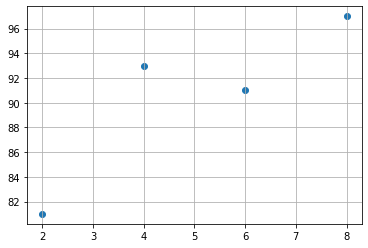

In [ ]:
plt.figure(1)
plt.scatter(x,y)
plt.grid()


 - $H(x)$ (hypothesis 가설 함수): 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가 

 $H(x)=ax+b$

 - $cost(ax+b)(비용함수)=MSE$ : $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

- cost function,loss function,objective function 비슷한 맥락에서 사용 

[미묘한 차이 존재](https://blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221386278997&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView)


## 지난 시간에.. 

비용함수 ,cost(MSE)가 최소가 되는 a,b 가 제일 예측을 잘한 직선이였음 

## Cost 를 최소화 했을때 a,b 를 찾아 보자 -> 미분! 

$$ \frac{\partial cost}{\partial a} = \frac{2}{m} \sum^m_{i=1} \left( (ax^{(i)}+b) - y^{(i)} \right)x^{(i)} $$

- 똑같이 b 도

In [ ]:
x_data = np.array(x) # 계산 편리화를 위해 npArray 로 만들음
y_data = np.array(y)

# a,b 초기화 (막 0 으로 초기화 해도 될까?)
# 초기화를 좀 더 잘해보자((심화) keyword = xavier initialization) 내용 어려워!! 언급만 해도 ㄱㅊ
a=0 
b=0
lr =0.03 # learning rate 는 어떻게 조절? 
epochs = 2001 # epoch 란?

In [ ]:
for i in range(epochs):
  y_pred=a*x_data+b     # 예측  hypothesis 가설함수 H(x)
  error = y_pred- y_data  # 예측 - 정답 = 오차

  # a,b 미분 값 구하기
  a_diff = (2/len(x_data))*sum(x_data*error) # gradient a
  b_diff = (2/len(x_data))*sum(error) # gradient b

  # 기존 a,b 값 갱신
  a -= lr*a_diff
  b -= lr*b_diff

  if i%100==0:
    print("epoch=%d 기울기=%.5f 절편=%.5f"%(i,a,b))
  


epoch=0 기울기=27.84000 절편=5.43000
epoch=100 기울기=7.07386 절편=50.51166
epoch=200 기울기=4.09600 절편=68.28224
epoch=300 기울기=2.97568 절편=74.96781
epoch=400 기울기=2.55420 절편=77.48303
epoch=500 기울기=2.39563 절편=78.42929
epoch=600 기울기=2.33598 절편=78.78529
epoch=700 기울기=2.31354 절편=78.91922
epoch=800 기울기=2.30509 절편=78.96961
epoch=900 기울기=2.30192 절편=78.98857
epoch=1000 기울기=2.30072 절편=78.99570
epoch=1100 기울기=2.30027 절편=78.99838
epoch=1200 기울기=2.30010 절편=78.99939
epoch=1300 기울기=2.30004 절편=78.99977
epoch=1400 기울기=2.30001 절편=78.99991
epoch=1500 기울기=2.30001 절편=78.99997
epoch=1600 기울기=2.30000 절편=78.99999
epoch=1700 기울기=2.30000 절편=79.00000
epoch=1800 기울기=2.30000 절편=79.00000
epoch=1900 기울기=2.30000 절편=79.00000
epoch=2000 기울기=2.30000 절편=79.00000


## 결과 확인!

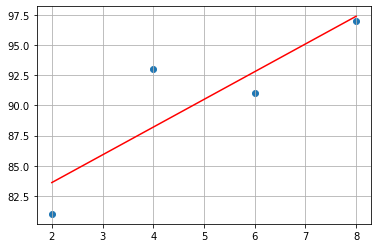

In [ ]:
y_pred = a*x_data + b 
plt.scatter(x,y)
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)],'r')
plt.grid(True)

In [ ]:
# 9시간 공부했을땐 몇점??
print(a*9+b)

99.70000012415323


## 다중 선형회귀

In [ ]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]] # [x1,x2,y]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]

y = [i[2] for i in data]

x1,x2,y

([2, 4, 6, 8], [0, 4, 2, 3], [81, 93, 91, 97])

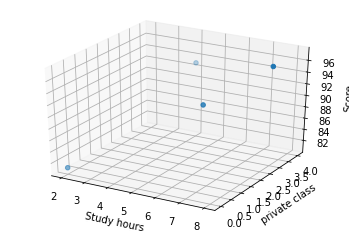

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.set_xlabel("Study hours")
ax.set_ylabel("private class")
ax.set_zlabel("Score")
ax.scatter(x1,x2,y)

In [ ]:
x1_data = np.array(x1) # 계산 편리화를 위해 npArray 로 만들음
x2_data = np.array(x2) # 계산 편리화를 위해 npArray 로 만들음
y_data = np.array(y)

# a,b 초기화 (막 0 으로 초기화 해도 될까?)
# 초기화를 좀 더 잘해보자((심화) keyword = xavier initialization) 내용 어려워!! 언급만 해도 ㄱㅊ
a1=0
a2=0 
b1=0
lr =0.00001 # learning rate 는 어떻게 조절?
epochs = 2001 #epoch 란? 

In [ ]:
for i in range(epochs):
  y_pred = a1*x1_data + a2*x2_data + b     # 예측  hypothesis 가설함수 H(x)
  error = y_pred - y_data  # 예측 - 정답 = 오차

  # a,b 미분 값 구하기
  a1_diff = (2/len(x1_data))*sum(x1_data*error) # gradient a1
  a2_diff = (2/len(x2_data))*sum(x2_data*error) # gradient a2
  b_diff = (2/len(x_data))*sum(error) # gradient b

  # 기존 a,b 값 갱신
  a1 -= lr*a1_diff
  a2 -= lr*a2_diff
  b -= lr*b_diff

  if i%100==0:
    print("epoch=%d 기울기1=%.5f 기울기2=%.5f 절편=%.5f"%(i,a1,a2,b))
  

epoch=0 기울기1=1.38000 기울기2=0.67000 절편=79.23000
epoch=100 기울기1=1.38594 기울기2=2.14818 절편=78.90461
epoch=200 기울기1=1.39158 기울기2=2.24194 절편=78.61860
epoch=300 기울기1=1.41946 기울기2=2.25749 절편=78.41126
epoch=400 기울기1=1.44128 기울기2=2.26541 절편=78.26041
epoch=500 기울기1=1.45725 기울기2=2.27095 절편=78.15064
epoch=600 기울기1=1.46889 기울기2=2.27497 절편=78.07074
epoch=700 기울기1=1.47736 기울기2=2.27790 절편=78.01260
epoch=800 기울기1=1.48352 기울기2=2.28002 절편=77.97028
epoch=900 기울기1=1.48801 기울기2=2.28157 절편=77.93948
epoch=1000 기울기1=1.49127 기울기2=2.28270 절편=77.91707
epoch=1100 기울기1=1.49365 기울기2=2.28352 절편=77.90075
epoch=1200 기울기1=1.49538 기울기2=2.28412 절편=77.88888
epoch=1300 기울기1=1.49664 기울기2=2.28455 절편=77.88024
epoch=1400 기울기1=1.49755 기울기2=2.28487 절편=77.87395
epoch=1500 기울기1=1.49822 기울기2=2.28510 절편=77.86938
epoch=1600 기울기1=1.49870 기울기2=2.28527 절편=77.86605
epoch=1700 기울기1=1.49906 기울기2=2.28539 절편=77.86362
epoch=1800 기울기1=1.49931 기울기2=2.28548 절편=77.86186
epoch=1900 기울기1=1.49950 기울기2=2.28554 절편=77.86058
epoch=2000 기울기1=1.49964 기울기2=2.2

In [ ]:
print(a1*3+a2*6+b) # 3시간 공부 6번 과외 점수는?

96.07208141189065


## x1,x2,x3 ... 정보가 많아지면??

배추값 예측 

-> 최저온도,최고온도,평균온도,일교차,날짜,강수량,습도, 등등 

여러 요소 (x) 들로 배추값 (y) 를 예측 

이때 x1 x2 를 다 위에 같이 따로 할까?

ㄴㄴ **행렬곱**을 이용!! -> 실습하면 좋은데.. 이론 언급만

## 다음시간엔 ...

YES OR NO 예측해보기 -> 로지스틱 회귀